In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Enable inline plotting
%matplotlib inline


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# Load the dataset (Update the file path)
df = pd.read_csv("retail_sales_dataset.csv")

# Display first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [39]:
# Check for missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [40]:
# Fill missing values with forward fill (ffill) or drop them
df.fillna(method='ffill', inplace=True)  # Forward fill
# OR
df.dropna(inplace=True)  # Drop missing values if necessary

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert categorical columns
df['Product Category'] = df['Product Category'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [43]:
# Summary statistics
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [44]:
# Mean, Median, Mode, Standard Deviation for Total Amount
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]  # Mode can have multiple values, take the first
std_sales = df['Total Amount'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation: {std_sales}")

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation: 559.997631555123


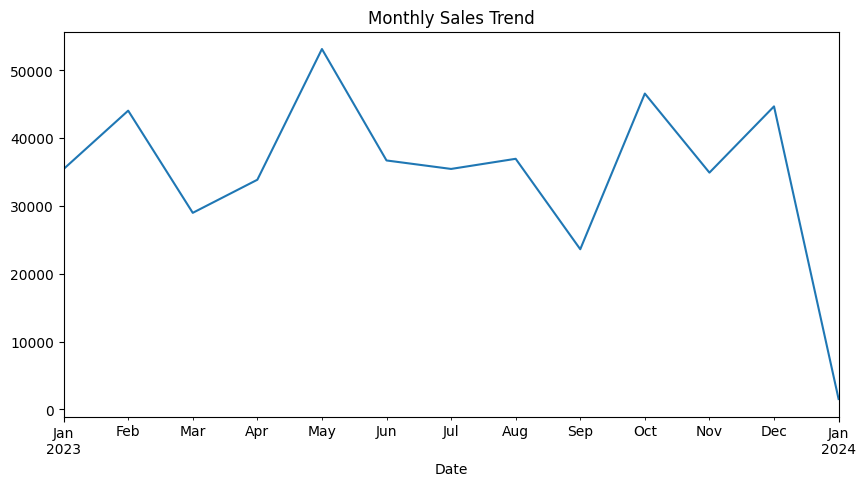

In [45]:
# Set the date column as index
df.set_index('Date', inplace=True)

# Plot monthly sales trend
df['Total Amount'].resample('M').sum().plot(figsize=(10,5), title="Monthly Sales Trend")
plt.show()

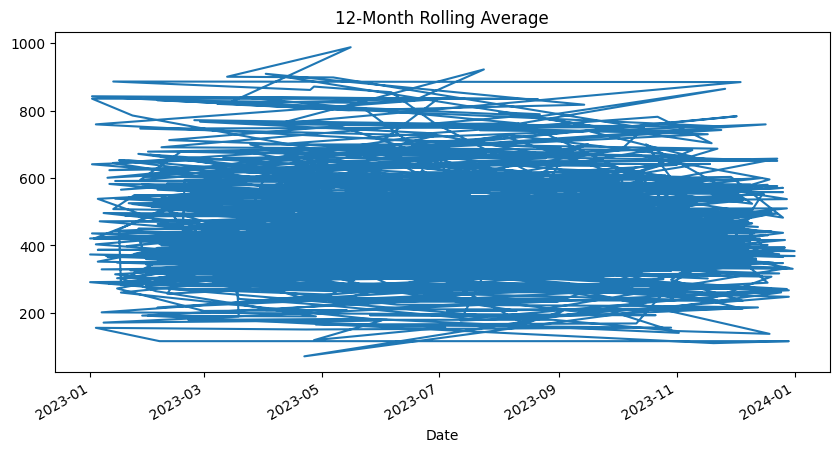

In [46]:
# Rolling Mean to detect seasonality
df['Total Amount'].rolling(window=12).mean().plot(figsize=(10,5), title="12-Month Rolling Average")
plt.show()

In [47]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


In [48]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [49]:
df['Order_Value'] = df['Total Amount'] / df['Quantity']
avg_order_value = df['Order_Value'].mean()
print(f"Average Order Value: {avg_order_value}")

Average Order Value: 179.89


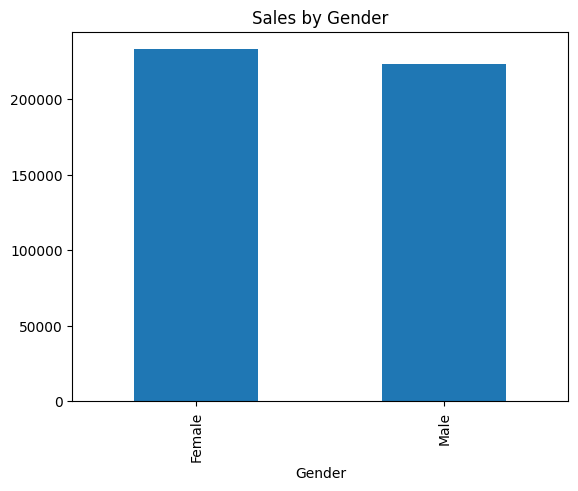

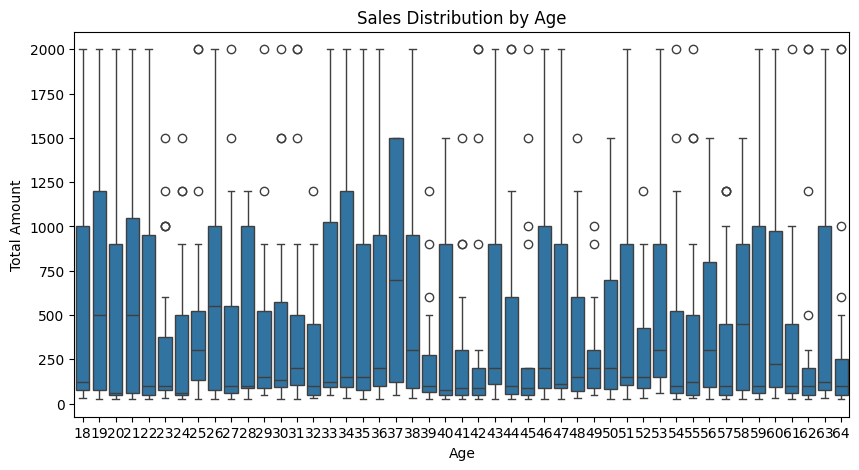

In [50]:
# Sales distribution by Gender
df.groupby('Gender')['Total Amount'].sum().plot(kind='bar', title="Sales by Gender")
plt.show()

# Sales distribution by Age Group
plt.figure(figsize=(10,5))
sns.boxplot(x='Age', y='Total Amount', data=df)
plt.title("Sales Distribution by Age")
plt.show()

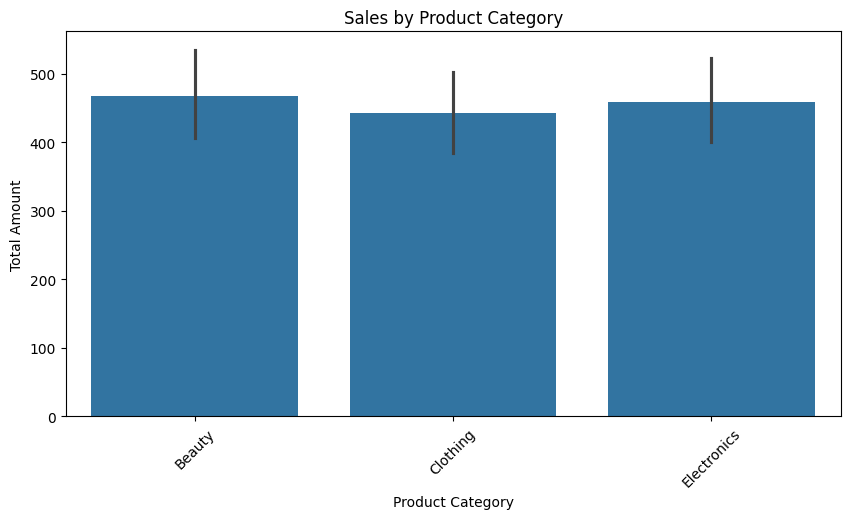

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product Category', y='Total Amount', data=df)
plt.xticks(rotation=45)
plt.title("Sales by Product Category")
plt.show()

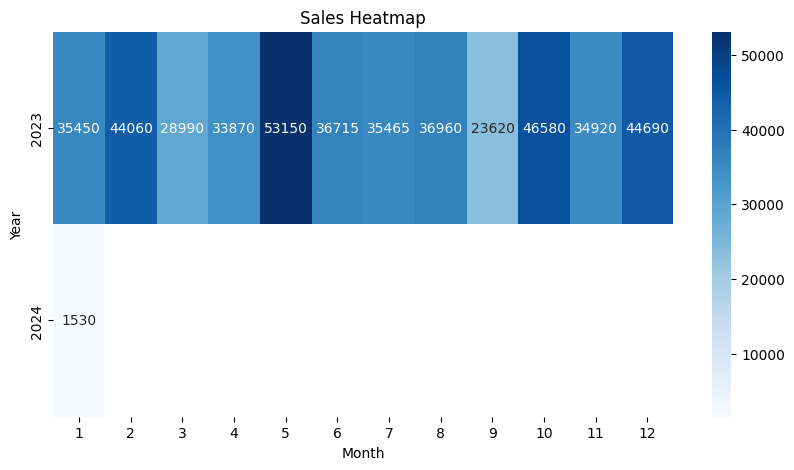

In [52]:
df['Month'] = df.index.month
df['Year'] = df.index.year

# Pivot table for heatmap
pivot_table = df.pivot_table(values='Total Amount', index='Year', columns='Month', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f")
plt.title("Sales Heatmap")
plt.show()

In [54]:
# Step 7: Recommendations 

# Identify Peak Sales Month
monthly_sales = df.resample('M')['Total Amount'].sum()
peak_month = monthly_sales.idxmax().strftime('%B')  # Convert to month name
print(f"🔹 Peak Sales Month: {peak_month} → Increase marketing before {peak_month}.")

# Identify Low-Selling Products
low_selling_products = df.groupby('Product Category')['Total Amount'].sum().nsmallest(5)
print("\n🔹 Low-Selling Products (Consider Discounts/Discontinuation):")
print(low_selling_products)

# Identify Top Customers
top_customers = df.groupby('Customer ID')['Total Amount'].sum().nlargest(5)
print("\n🔹 Top Customers (Recommend Loyalty Programs):")
print(top_customers)

# Identify High-Spending Age Groups
age_group_sales = df.groupby('Age')['Total Amount'].sum()
top_spending_age_group = age_group_sales.idxmax()
print(f"\n🔹 High-Spending Age Group: {top_spending_age_group} → Targeted promotions recommended.")

# Identify Sales Dips (Lowest Sales Month)
lowest_month = monthly_sales.idxmin().strftime('%B')
print(f"\n🔹 Lowest Sales Month: {lowest_month} → Investigate reasons & improve strategy.")


🔹 Peak Sales Month: May → Increase marketing before May.

🔹 Low-Selling Products (Consider Discounts/Discontinuation):
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

🔹 Top Customers (Recommend Loyalty Programs):
Customer ID
CUST015    2000
CUST065    2000
CUST072    2000
CUST074    2000
CUST089    2000
Name: Total Amount, dtype: int64

🔹 High-Spending Age Group: 43 → Targeted promotions recommended.

🔹 Lowest Sales Month: January → Investigate reasons & improve strategy.
